In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# reading the data
data = pd.read_csv('Netflix-Subscriptions.csv')
print(data.head())

  Time Period  Subscribers
0  01/04/2013     34240000
1  01/07/2013     35640000
2  01/10/2013     38010000
3  01/01/2014     41430000
4  01/04/2014     46130000


In [2]:
!pip install statsmodels


     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 1.3 MB/s eta 0:00:08
     ---------------------------------------- 0.1/9.2 MB 939.4 kB/s eta 0:00:10
      --------------------------------------- 0.1/9.2 MB 654.9 kB/s eta 0:00:14
      --------------------------------------- 0.1/9.2 MB 607.9 kB/s eta 0:00:15
      --------------------------------------- 0.2/9.2 MB 538.9 kB/s eta 0:00:17
      --------------------------------------- 0.2/9.2 MB 538.9 kB/s eta 0:00:17
      --------------------------------------- 0.2/9.2 MB 538.9 kB/s eta 0:00:17
      --------------------------------------- 0.2/9.2 MB 538.9 kB/s eta 0:00:17
      --------------------------------------- 0.2/9.2 MB 538.9 kB/s eta 0:00:17
      --------------------------------------- 0.2/9.2 MB 338.5 kB/s eta 0:00:27
      --------------------------------------- 0.2/9.2 MB 355

In [4]:
data['Time Period'] = pd.to_datetime(data['Time Period'], 
                                     format='%d/%m/%Y')
print(data.head())

  Time Period  Subscribers
0  2013-04-01     34240000
1  2013-07-01     35640000
2  2013-10-01     38010000
3  2014-01-01     41430000
4  2014-04-01     46130000


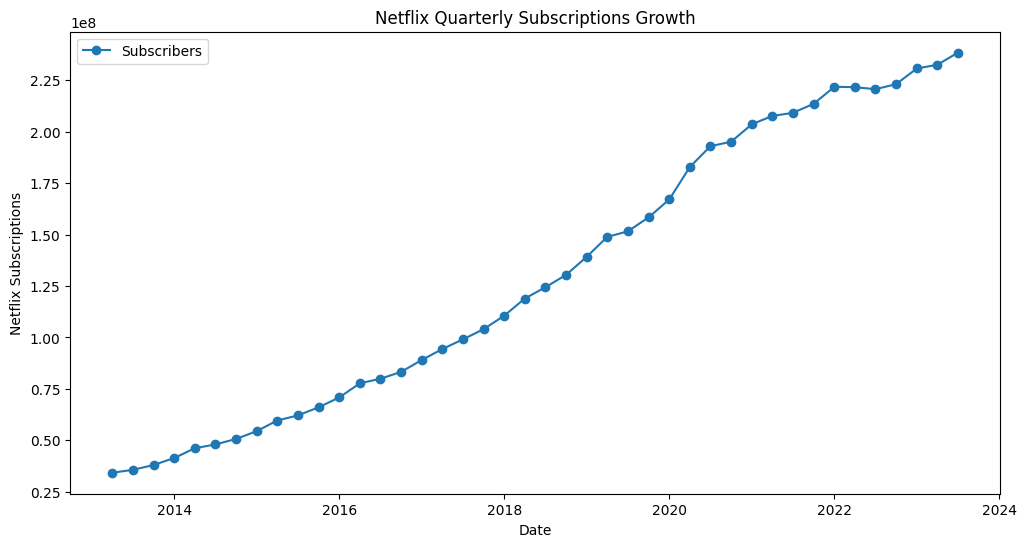

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['Time Period'], data['Subscribers'], label='Subscribers', marker='o')
plt.title('Netflix Quarterly Subscriptions Growth')
plt.xlabel('Date')
plt.ylabel('Netflix Subscriptions')
plt.legend()
plt.show()

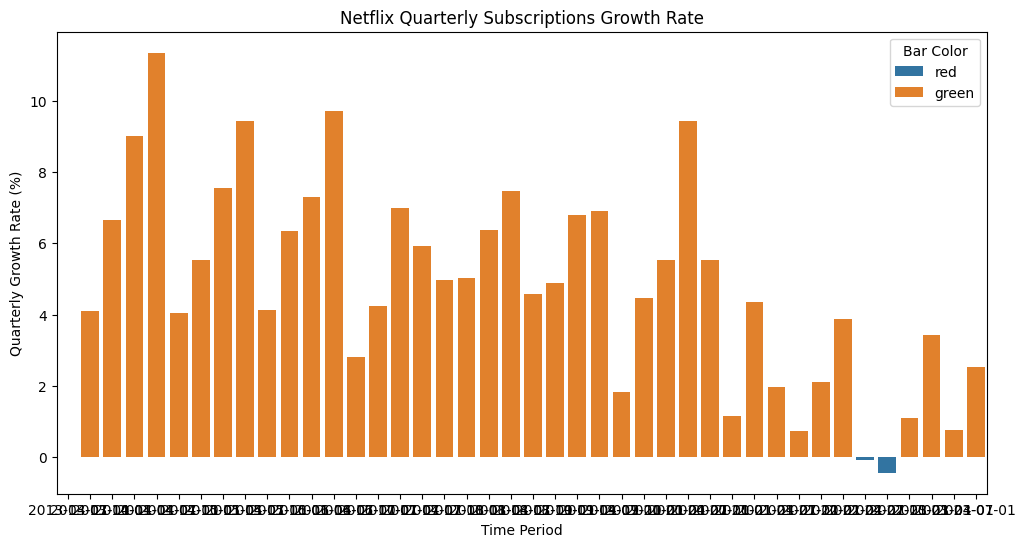

In [9]:
plt.figure(figsize=(12, 6))

# Calculate the quarterly growth rate
data['Quarterly Growth Rate'] = data['Subscribers'].pct_change() * 100

# Create a new column for bar color (green for positive growth, red for negative growth)
data['Bar Color'] = data['Quarterly Growth Rate'].apply(lambda x: 'green' if x > 0 else 'red')

# Plot the quarterly growth rate using bar graphs
sns.barplot(x='Time Period', y='Quarterly Growth Rate', data=data, hue='Bar Color', dodge=False)
plt.title('Netflix Quarterly Subscriptions Growth Rate')
plt.xlabel('Time Period')
plt.ylabel('Quarterly Growth Rate (%)')
plt.show()

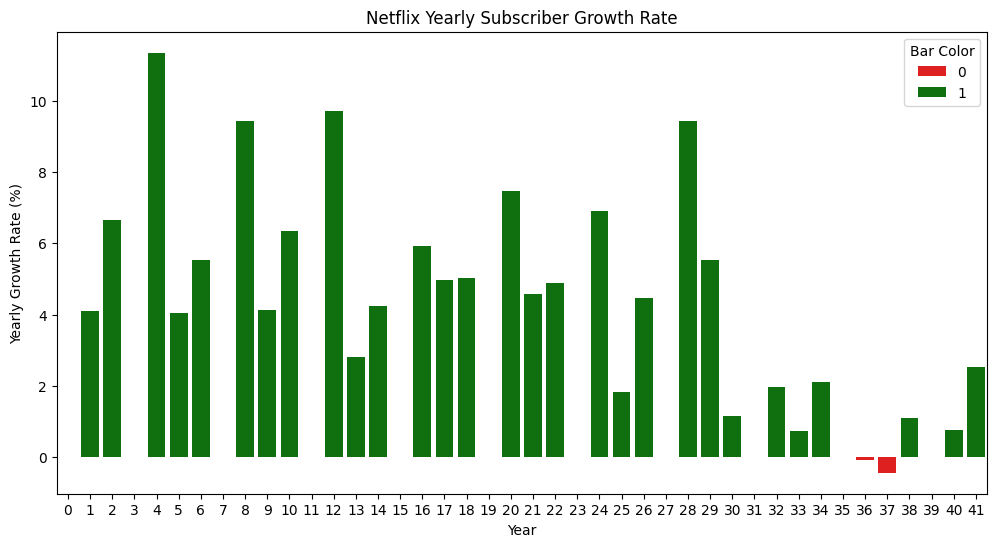

In [32]:

# Calculate the yearly growth rate
data['Year'] = data['Time Period'].dt.year
yearly_growth = data.groupby('Year')['Subscribers'].pct_change().fillna(0) * 100

# Create a new DataFrame for hue information
hue_data = pd.DataFrame({'Year': data['Year'], 'Bar Color': data['Bar Color']})

# Map 'green' to 1 and 'red' to 0
hue_data['Bar Color'] = hue_data['Bar Color'].map({'green': 1, 'red': 0})

# Plot the yearly subscriber growth rate using bar graphs
plt.figure(figsize=(12, 6))
sns.barplot(x=hue_data.index, y=yearly_growth, hue=hue_data['Bar Color'], dodge=False, palette={0: 'red', 1: 'green'})
plt.title('Netflix Yearly Subscriber Growth Rate')
plt.xlabel('Year')
plt.ylabel('Yearly Growth Rate (%)')
plt.show()


In [19]:
data.head()

,Time Period,Subscribers,Quarterly Growth Rate,Bar Color,Year
0,2013-04-01,34240000,NaN,red,2013
1,2013-07-01,35640000,4.088785,green,2013
2,2013-10-01,38010000,6.649832,green,2013
3,2014-01-01,41430000,8.997632,red,2014
4,2014-04-01,46130000,11.344436,green,2014


In [20]:
time_series = data.set_index('Time Period')['Subscribers']

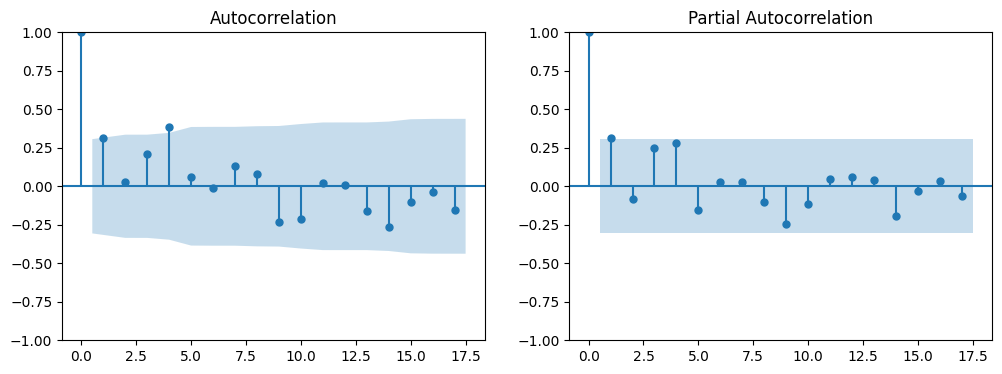

In [21]:
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [22]:
p, d, q = 1, 1, 1
model = ARIMA(time_series, order=(p, d, q))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Wed, 22 Nov 2023   AIC                           1351.986
Time:                        19:21:29   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.760      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.0

C:\Users\User\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

C:\Users\User\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

C:\Users\User\anaconda3\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



In [23]:
future_steps = 5
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
predictions = predictions.astype(int)

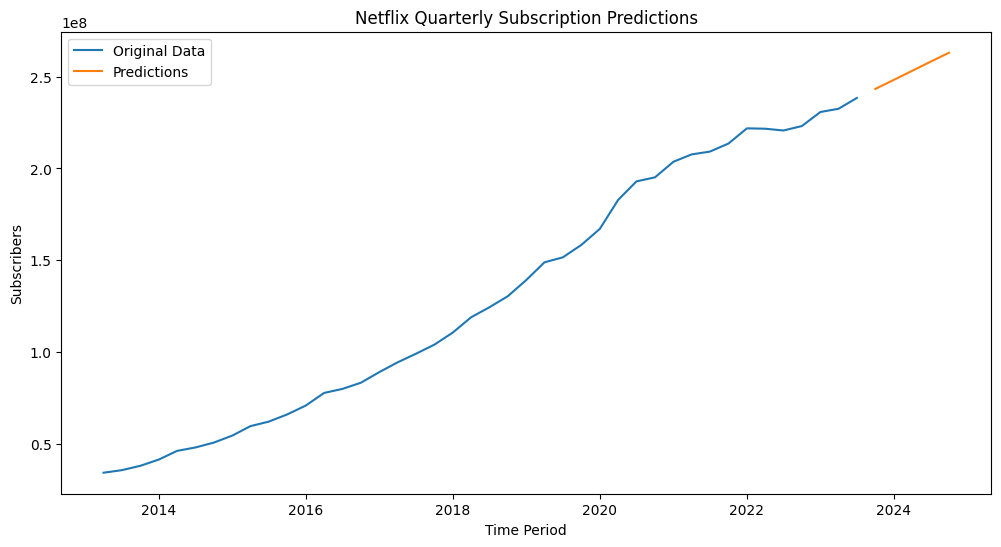

In [26]:

forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(forecast.index, forecast['Original'], label='Original Data')
plt.plot(forecast.index, forecast['Predictions'], label='Predictions')
plt.title('Netflix Quarterly Subscription Predictions')
plt.xlabel('Time Period')
plt.ylabel('Subscribers')
plt.legend()
plt.show()
